# Exploratory Data Analysis

# Exploratory Analyses

In [ ]:
# Imports Pandas, Pyplot from Matplotlib, and Numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

## Crema-D

In [42]:
# Imports the Crema-D Video Demographic CSV file as a pandas dataframe
cremaDDemos = pd.read_csv("/Users/jameshatch/Documents/GitHub/Bias-in-Emotion-Recognition/data/Crema-D/VideoDemographics.csv") # Assuming 'data' is a folder in your repo
print(cremaDDemos.head())

   ActorID  Age     Sex              Race     Ethnicity
0     1001   51    Male         Caucasian  Not Hispanic
1     1002   21  Female         Caucasian  Not Hispanic
2     1003   21  Female         Caucasian  Not Hispanic
3     1004   42  Female         Caucasian  Not Hispanic
4     1005   29    Male  African American  Not Hispanic


In [43]:
# Summary statistics for the Crema-D Dataset
cremaDDemos.describe()

,ActorID,Age
count,91.00000,91.000000
mean,1046.00000,36.428571
std,26.41338,13.269968
min,1001.00000,20.000000
25%,1023.50000,25.000000
50%,1046.00000,33.000000
75%,1068.50000,45.500000
max,1091.00000,74.000000


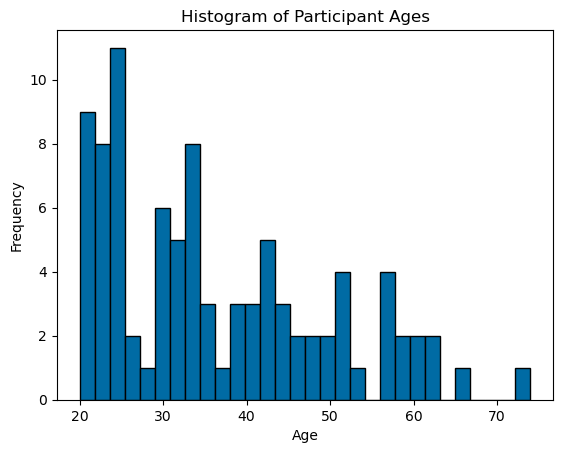

In [44]:
# Creates a histogram using the 'Age' column of the Crema-D video demographic csv. The histogram
# displays the frequency of certain ages within the dataset using a collection of 30 age-categorizing bins.
plt.hist(cremaDDemos['Age'], bins=30, edgecolor='black')

# Creates axis labels and a title for the histogram
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Participant Ages")

# Displays the histogram
plt.show()

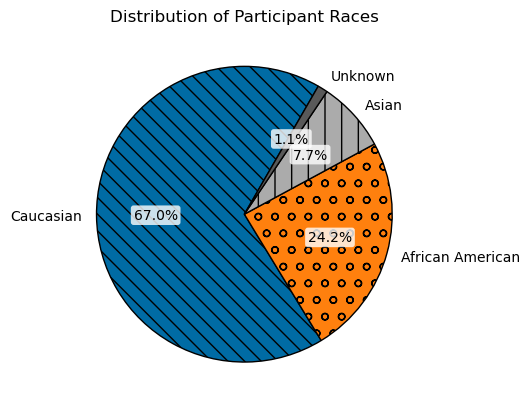

In [45]:
# Imports matplotlib styles and patches
import matplotlib.style as style
from matplotlib.patches import Rectangle

# Uses a colorblind-friendly style
style.use('tableau-colorblind10') 

# Creates a pandas dataframe using the 'Race' colummn in the Crema-D demographic dataframe.
# Counts the number of occurences of each race in the race column and creates a new table where
# each race has a corresponding occurrence count.
race_counted = cremaDDemos['Race'].value_counts()

# Creates a pie plot of the race distribution using the count values from the value_counts command as the 
# slice size variable and the labels of each race as the labels for each pie slice. Includes the 
# percentages of each pie slice and a starting angle which prevents labels from overlapping
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    race_counted.values,
    labels=race_counted.index,
    autopct='%1.1f%%',
    startangle=60
)

# Defines hatching patterns for each of the four race pie plot slices
hatches = ['\\\\', 'o', '|', '']

# Adds hatch textures and black edges to each slice to improve visibility
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i % len(hatches)]) 
    wedge.set_edgecolor('black')

# Adds a white background on top of the autotext to improve readability
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.2'))

# Changes the title of the pie plot
plt.title("Distribution of Participant Races")

# Shows the pie plot
plt.show()

## Speech Accent Archive

In [46]:
# Imports the Speech Accent Archive's speakers_all file as a pandas dataframe
accentArchiveDemos = pd.read_csv("/Users/jameshatch/Documents/GitHub/Bias-in-Emotion-Recognition/data/Speech Accent Archive/speakers_all.csv") # Assuming 'data' is a folder in your repo
print(accentArchiveDemos.head())

    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


In [47]:
accentArchiveDemos.describe()

,age,age_onset,speakerid,Unnamed: 9,Unnamed: 10
count,2172.000000,2172.000000,2172.000000,0.0,0.0
mean,33.117173,8.833333,1088.449355,NaN,NaN
std,14.453039,8.451127,628.420329,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN
25%,22.000000,0.000000,543.750000,NaN,NaN
50%,28.000000,8.000000,1088.500000,NaN,NaN
75%,41.000000,13.000000,1632.250000,NaN,NaN
max,97.000000,86.000000,2176.000000,NaN,NaN


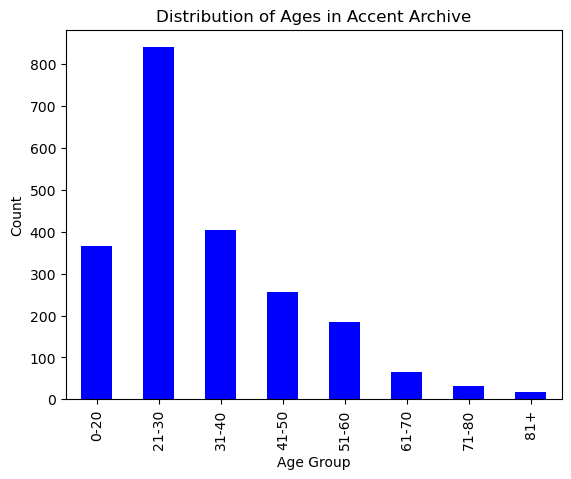

In [48]:
# age plot (binned)
accentArchiveDemos['age'] = pd.to_numeric(accentArchiveDemos['age'], errors='coerce')
accent = accentArchiveDemos[accentArchiveDemos['age'].notna()]

bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
accentArchiveDemos['age_group'] = pd.cut(accentArchiveDemos['age'], bins=bins, labels=labels, right=True)

accentArchiveDemos['age_group'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title("Distribution of Ages in Accent Archive")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

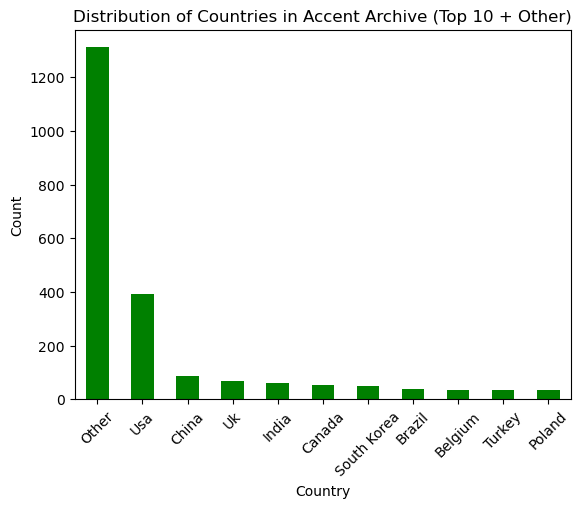

In [49]:
# country plot
accentArchiveDemos['country_clean'] = accentArchiveDemos['country'].str.strip().str.title()
accentArchiveDemos = accentArchiveDemos[accentArchiveDemos['country_clean'].notna() & (accentArchiveDemos['country_clean'] != '')]

top_countries = accentArchiveDemos['country_clean'].value_counts().nlargest(10).index
accentArchiveDemos['country_final'] = accentArchiveDemos['country_clean'].apply(lambda x: x if x in top_countries else 'Other')

accentArchiveDemos['country_final'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Countries in Accent Archive (Top 10 + Other)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()